Parameters([('amp', <Parameter 'amp', 5, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', 2, bounds=[-inf:2]>), ('wid', <Parameter 'wid', 2, bounds=[-inf:inf]>)])
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 7
    # variables        = 3
    chi-square         = 10.8540645
    reduced chi-square = 2.71351612
    Akaike info crit   = 9.07040627
    Bayesian info crit = 8.90813672
[[Variables]]
    amp:  9.60498863 (init = 5)
    cen:  2.00000000 (init = 2)
    wid:  0.76446686 (init = 2)



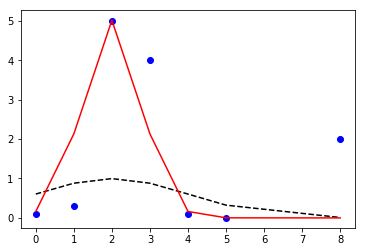

(['amp', 'cen', 'wid'], ['x'])


In [1]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model
import lmfit



def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)

#data = loadtxt('model1d_gauss.dat')
x = [0,1,2,3,4,5, 8]
y = [.1, .3, 5, 4, .1,.01, 2]

gpars = lmfit.Parameters()
gpars.add('amp', value=5, vary=True)
gpars.add('cen', value=5, max=2, vary=True)
gpars.add('wid', value=2, vary=True)
print(gpars)

result = gmodel.fit(data=y, x=x, params=gpars)

print(result.fit_report())

plt.plot(x, y, 'bo')
assert len(result.init_fit) ==len(x)
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()
# <end examples/doc_model_gaussian.py>

print(gmodel.param_names, gmodel.independent_vars)

lhand = 0.903442361044390
rhand = 0.903169738393685
trap = 0.903306049719037
exact = 0.903306088307605


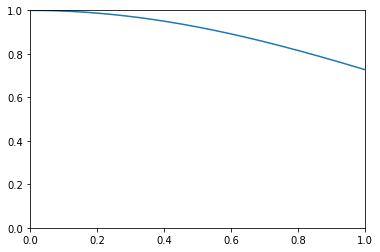

In [2]:
#!/usr/bin/env python
# plot the integrand and approximate
# the integral
#    / 1
#    |    exp(-xˆ2/pi) dx
#    / 0
# by left-hand, right-hand, and
# trapezoid rules
from pylab import plot,axis,linspace,sum, \
pi,sqrt,exp,show,grid
from scipy.special import erf
N = 1000
dx = (1.0 - 0.0) / N
x = linspace(0.0,1.0,N+1)
y = exp(- x**2 / pi)
plot(x,y)
axis([0.0,1.0,0.0,1.0])
lhand = dx*sum(y[:-1])
print "lhand = %.15f" % lhand
rhand = dx*sum(y[1:])
print "rhand = %.15f" % rhand
trap  = (dx/2)*sum(y[:-1]+y[1:])
print "trap = %.15f" % trap
exact = (pi/2)*erf(1/sqrt(pi))
print "exact = %.15f" % exact
show()  # allow user to close figure

[[Model]]
    Model(numericexpint)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 9
    # variables        = 1
    chi-square         = 0.00000000
    reduced chi-square = 0.00000000
    Akaike info crit   = -inf
    Bayesian info crit = -inf
[[Variables]]
    m:  1.10000000 +/- 0.00000000 (0.00%) (init = 1)



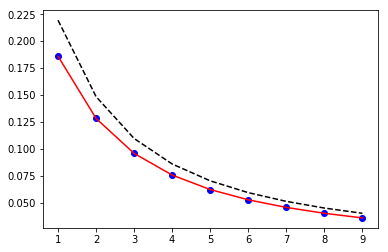

In [5]:
if True:
    import numpy as np
    import sympy
    import lmfit

    def numericexpint(t, m):
        values = [sympy.N(sympy.expint(i,m)) for i in t]
        return np.array(values, dtype='float')

    x = range(1, 10)
    y = numericexpint(x, 1.1)

    mymodel = lmfit.Model(numericexpint)

    result = mymodel.fit(y, t=x, m=1)
    print(result.fit_report())

plt.plot(x, y, 'bo')
assert len(result.init_fit) ==len(x)
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [19]:
import sympy
import scipy
print(sympy.N(sympy.expint(.5,.5)))
print(scipy.special.expn(.5,.5))

0.795379490846703
1.21306131943


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: floating point number truncated to an integer
  after removing the cwd from sys.path.
